# 03. PyTorch Computer Vision Exercises

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "mps" if  torch.backends.mps.is_built()\
    else "gpu" if torch.cuda.is_available() else "cpu"
print(device)

2.1.0.dev20230709
mps


### 1. What are 3 areas in industry where computer vision is currently being used?

- **Manufacturing and Quality Control:** -> to ensure product quality, detect defects, and streamline production. Cameras and machine learning algorithms can inspect products in real-time, identifying any abnormalities, deviations, or flaws. This application helps maintain consistency and reduces human error, ultimately leading to improved product quality and efficiency.

- **Autonomous Vehicles:** -> self-driving cars and other autonomous vehicles. Computer vision plays a crucial role in these systems by allowing vehicles to perceive and interpret their surroundings. Cameras, LiDAR, and other sensors capture data, which is then processed by computer vision algorithms to identify objects, pedestrians, road signs, and lane markings, enabling the vehicle to make informed decisions and navigate safely.

- **Healthcare:** -> aiding in medical imaging analysis, diagnostics, and surgical assistance. Medical imaging technologies, such as MRI, CT scans, and X-rays, generate vast amounts of visual data that can be processed using computer vision algorithms. This enables medical professionals to detect and diagnose conditions more accurately and efficiently, leading to improved patient outcomes and enhanced medical decision-making.

### 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

> **model becomes overly complex and overly specific to the training data noise and individual examples.**

### 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- **regularization** -> introduce regularization techniques like L1 (Lasso) and L2 (Ridge) regularization to the model's loss function
- **dropout** -> randomly selected neurons are "dropped out" (i.e., temporarily removed) from the network
- **early stopping** -> monitor the model's performance on a validation set during training and stop the training process when the performance starts to degrade


### 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

### 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [2]:
import torchvision
from torchvision import datasets
from torchvision import transforms

from torchvision.transforms import ToTensor

In [3]:
# load the data
train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform=torchvision.transforms.ToTensor(),
                            target_transform=None)
test_data = datasets.MNIST(root="data",
                           train=False,
                           download=True,
                           transform=torchvision.transforms.ToTensor(),
                           target_transform=None)
len(train_data), len(test_data)

100%|██████████| 9912422/9912422 [00:06<00:00, 1445946.93it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 140374.11it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:03<00:00, 441810.03it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4795.56it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(60000, 10000)

### 6. Visualize at least 5 different samples of the MNIST training dataset.

In [4]:
# visulize
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [5]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

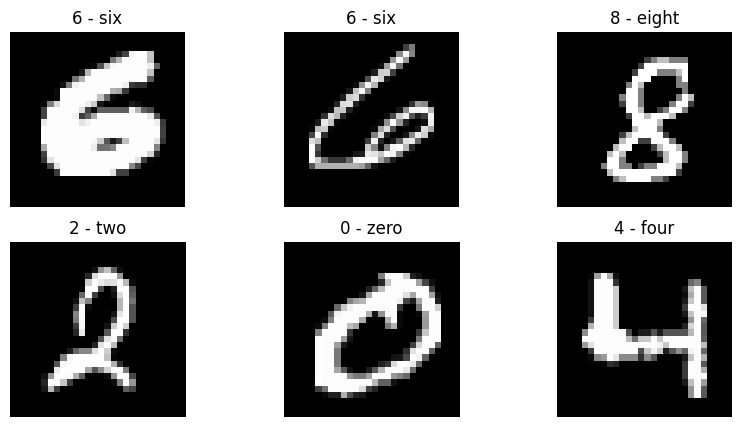

In [6]:
import matplotlib.pyplot as plt

torch.manual_seed(42)

fig = plt.figure(figsize=(10, 5))
rows, cols = 2, 3
for i in range(1, rows * cols + 1):
    random_inx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_inx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

### 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x16a41ca90>,
 <torch.utils.data.dataloader.DataLoader at 0x16a41fd90>)

In [11]:
print("Length of train_dataloader:", len(train_dataloader), " -> batches of", BATCH_SIZE)
print("Length of test_dataloader:", len(test_dataloader), " -> batches of", BATCH_SIZE)

Length of train_dataloader: 1875  -> batches of 32
Length of test_dataloader: 313  -> batches of 32


### 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

### 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

### 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

### 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

### 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

### 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?